In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fasttext
from pycountry import languages
import re


In [2]:
# reading in the data
data = pd.read_json("PRC-UK_Embassy_press_releases.ndjson",lines=True)

In [3]:
# creating new columns for the length of title and body in terms of words
data["title_length"] = data["title"].str.split().apply(len)
data["body_length"] = data["body"].str.split().apply(len)

In [17]:
# fixing the datetime issues early on (the screwey values)
# if the date is before 2021-01-31, then the ambassador is Liu Xiaoming
data.loc[data["date"] < "2021-01-31", "ambassador"] = "Ambassador Liu Xiaoming"
# if the date is after 2021-06-07, then the ambassador is Zheng Zeguang
data.loc[data["date"] > "2021-06-07" , "ambassador"] = "Ambassador Zheng Zeguang"
# if the date is neither of those, then the ambassador is "Vacant"
data.loc[(data["date"] < "2021-06-07") & (data["date"] > "2021-01-31"), "ambassador"] = "Vacant"

<AxesSubplot:ylabel='ambassador'>

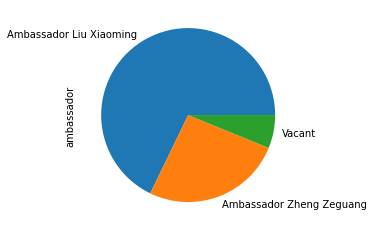

In [22]:
data["ambassador"].value_counts().plot.pie()

In [23]:
data.to_json("PRC-UK_Embassy_press_releases_cleaned.ndjson",orient="records",lines=True)